<img src="img/TVM1.png" title="Time Value of Money"/>

<div class="alert alert-block alert-success">
<b>Background:</b> In this section we will learn about using the Numpy and some other packages to calculate vaious components associated with <b>Time Value of Money</b>
</div>

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Installing relevant packages -> Numpy and SciPy</span></b>
</div>

In [1]:
# !python3 -m pip install --upgrade <package name> --- Pip install command in Python with Upgrade option
# !python3 -m pip install pytorch-lightning --- Pip install command in Python
# conda install pytorch-lightning -c conda-forge --- Conda install option (syntax)

In [2]:
# !python3 -m pip install --upgrade numpy

In [3]:
# !pip install numpy==1.18.5
# !pip install scipy==1.5.0
# !pip install numpy_financial==1.0.0
import numpy as np
import scipy as scp
import numpy_financial as npf
print(np.__version__)
print(scp.__version__)
print(npf.__version__)

1.18.5
1.5.0
1.0.0


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Calculate Time value of Money</span></b>
</div>

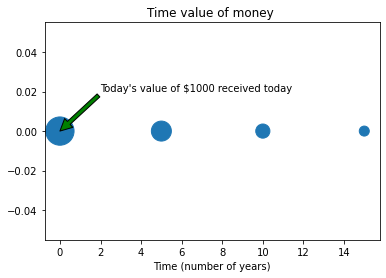

In [4]:
import numpy_financial as npf
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

fig1 = figure(facecolor='white')
ax1 = axes(frameon=True)
ax1.set_frame_on(True)
ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(True)
x=range(0,20,5)	
x1=range(len(x),0,-1)
y = [0]*len(x);
name="Today's value of $1000 received today"
annotate(name,xy=(0,0),xytext=(2,0.02),arrowprops=dict(facecolor='green',shrink=0.0003))
s = [50*2**n for n in x1];
title("Time value of money ")
xlabel("Time (number of years)")
scatter(x,y,s=s);
show()

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Calculate Future Value and Present Value of a given amount of Money</span></b>
</div>

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> What would be the <b>Future Value</b> of $5000 invested today at the end of 5th year with a 10% annual interest rate
</div>

<img src="img/TVM2.png" title="Time Value of Money"/>

<img src="img/TVM3.png" title="Time Value of Money"/>

In [13]:
# import numpy as np
from numpy_financial import fv
fv(0.1,5,0,5000)

-8052.550000000003

**python script**

numpy_financial.fv(rate, nper, pmt, pv, when='end')

__parameters:__
    
    rate:rate of interest as decimal (not per cent) per period
        
    nper:Number of compounding periods
        
    pmt:Payment
        
    pv:Present Value
        
    when:When payments are due (‘begin’ (1) or ‘end’ (0)). Defaults to {‘end’, 0}.

In [14]:
# Alternatively you can find the present value of $8052.55
from numpy_financial import pv
pv(0.1,5,0,8052.550000000003)

-5000.0

In [15]:
# One can try to use the formula shown above to calculate the PV of the $8052.550000000003 with 
# annual int. rate 10%
# PV = FV/(1+R)^n
8052.550000000003/(1+0.10)**5

5000.0

In [16]:
# You can seek help to know more about the function
help(fv)

Help on function fv in module numpy_financial._financial:

fv(rate, nper, pmt, pv, when='end')
    Compute the future value.
    
    Given:
     * a present value, `pv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value at the end of the `nper` periods
    
    Parameters
    ----------
    rate : scalar or array_like of shape(M, )
        Rate of interest as decimal (not per cent) per period
    nper : scalar or array_like of shape(M, )
        Number of compounding periods
    pmt : scalar or array_like of shape(M, )
        Payment
    pv : scalar or array_like of shape(M, )
        Present value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0)).
        Defaults to {'end', 0}.
    
   

In [17]:
help(pv)

Help on function pv in module numpy_financial._financial:

pv(rate, nper, pmt, fv=0, when='end')
    Compute the present value.
    
    Given:
     * a future value, `fv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value now
    
    Parameters
    ----------
    rate : array_like
        Rate of interest (per period)
    nper : array_like
        Number of compounding periods
    pmt : array_like
        Payment
    fv : array_like, optional
        Future value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0))
    
    Returns
    -------
    out : ndarray, float
        Present value of a series of payments or investments.
    
    Notes
    -----
    The present value is computed by s

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Use custom function to calculate Future Value and Present Value of a given amount of Money</span></b>
</div>

In [18]:
# Define the function for the PV caculation
def Custom_PresentValue(r, n, fv):
    '''
    This function is defined to calculate the present value of a future cashflow
    Params:
          r: rate of interest or period rate
          n: number of period
          fv: future value
          
    formula: pv = fv/(1+r)**n
    '''
    import numpy_financial as npf
    return(-npf.pv(r,n,0,fv))

In [19]:
Custom_PresentValue(0.1,5,8052.550000000003)

5000.0

In [20]:
# Define the function for the FV caculation
def Custom_FutureValue(r, n, pv):
    '''
    This function is defined to calculate the future value of present sum of money
    Params:
          r: rate of interest or period rate
          n: number of period
          pv: present value
          
    formula: fv = pv*(1+r)**n
    '''
    import numpy_financial as npf
    return(-npf.fv(r,n,0,pv))

In [21]:
Custom_FutureValue(0.1,5,5000)

8052.550000000003

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS"> Define our own Financial Calculator using custom functions</span></b>
</div>

In [22]:
def PresentValue_Func(fv,r,n):
    '''
    This function is defined to calculate the Present value of a future cash flow
    Params:
          r: rate of interest or period rate
          n: number of period
          fv: Future Value
          
    formula: pv = fv/(1+r)**n
    '''
    return fv/(1+r)**n

def PresentValue_Perpetuity(c,r):
    '''
    This function is defined to calculate the Present value of a perpetuity
    Params:
          r: rate of interest or period rate/annual discount rate
          c: cash flow
          
          
    formula: PVP = c/r
    '''
    return c/r

def PresentValue_PerpetuityGrowing(c,r,g):
    '''
    This function is defined to calculate the Present value of a perpetuity
    Params:
          r: rate of interest or period rate/annual discount rate
          c: cash flow
          g: consistant growth rate
          
          
    formula: PVPG = c/(r-g)
    '''
    return c/(r-g)

def PresentValue_PerpetuityDue(c,r):
    '''
    This function is defined to calculate the Present value of a perpetuity due
    Params:
          r: rate of interest or period rate
          c: cash flow
          
    formula: PVPD = c/r*(1+r)
    '''
    return c/r*(1+r)

def PresentValue_Annuity(c,r,n):
    '''
    This function is defined to calculate the Present value of a annuity
    Params:
          r: rate of interest or period rate
          c: cash flow
          n: number of period
          
    formula: PVA = c/r*(1-1/(1+r)**n)
    '''
    return c/r*(1-1/(1+r)**n)

def PresentValue_AnnuityDue(c,r,n):
    '''
    This function is defined to calculate the Present value of a annuity due
    Params:
          r: rate of interest or period rate
          c: cash flow
          n: number of period
          
    formula: PVPD = c/r*(1-1/(1+r)**n)*(1+r)
    '''
    return c/r*(1-1/(1+r)**n)*(1+r)

def PresentValue_AnnuityGrowing(c,r,n,g):
    '''
    This function is defined to calculate the Present value of a growing annuity
    Params:
          r: rate of interest or period rate
          c: cash flow
          n: number of period
          g: constant growth rate
          
    formula: PVPG = c/r*(1-(1+g)**n/(1+r)**n)
    '''
    return c/r*(1-(1+g)**n/(1+r)**n)

def FutureValue_Func(pv,r,n):
    '''
    This function is defined to calculate the Future value of a sum of money
    Params:
          r: rate of interest or period rate
          n: number of period
          pv: Present Value
          
    formula: fv = pv*(1+r)**n
    '''
    return pv*(1+r)**n

In [23]:
# calculate the following quantity
PresentValue_Func(8052.550000000003,0.1,5)

5000.0

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> How much should be contributed today to get a <b>perpetuity worth of $5000 per year</b> with annual discount rate of 2.5%

In [24]:
# we can apply the formula as PV(perpetuity) = C/R
PresentValue_Perpetuity(5000,0.025)

200000.0

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> How much should be contributed today to get a <b>growing perpetuity worth of $5000 per year</b> with annual discount rate of 2.5% and annual inflation rate is 1%

In [25]:
print(round(PresentValue_PerpetuityGrowing(5000,0.025,0.01),2))

333333.33


In [26]:
# This can be verified again
pv_ann_growing = 5000/(0.025-0.01)
print(round(pv_ann_growing,2))

333333.33


In [27]:
# Lets calculate the present value of an annuity - Cashflow:$5000, annula discount rate:8% and number of period: 5
PresentValue_Annuity(5000,0.08,5)

19963.550185390442

In [28]:
# Lets calculate the present value of an annuity - Cashflow:$5000, annula discount rate:8% and number of period: 5, growth rate: 1%
PresentValue_AnnuityGrowing(5000,0.08,5,0.01)

17793.763749271067

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> Assume the discount rate is 1% per year, 
the annual cash flow is $5000 
for the next 10 years.

The first cash flow will be paid today. What is the PV of those cash flows?


<img src="img/TVM6.png" title="PV & FV calculation of Annuity Due"/>

In [29]:
PresentValue_AnnuityDue(5000,0.01,10)

47830.08788004346

In [30]:
# Lets calculate the future value of sum total of money
FutureValue_Func(4967.370584473239,0.1,5)

8000.0

In [31]:
PresentValue_Func(8000,0.1,5)

4967.370584473239

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> How much should be invested today for say next 10 years with annual rate of return 8% , such that you intend to withdraw $7000 at the beginning of each year.

And moreover you expect to have $10000 at the end of the investment horizon.

<img src="img/TVM4.png" title="Time Value of Money"/>

In [32]:
import numpy_financial as npf
npf.pv(0.08,10,7000,10000,1)

-55360.15025684419

Similarly one can calculate the future value

<img src="img/TVM5.png" title="Time Value of Money"/>

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> Suppose we invest $5000 for 5 years. 

In addition, at the end of each year for the next 5 years, we also invest $1000. 
    
If the rate of the return is 8% per year, then what would be the future value of this investment

In [33]:
import numpy_financial as npf
npf.fv(0.08,5,1000,5000)

-13213.24134400001

In [34]:
# Future value of annuity for 1000
# FV(total) = FV(annuity) + FV(one PV)
fv_annuity = 1000/0.08*((1+0.08)**5-1)
# Future value of one PV = $5000
fv_one_PV = 5000*(1+0.08)**5
print('Future Value of Annuity: ',fv_annuity)
print('Future Value of one present value: ',fv_one_PV)
print('Future Value(total): ',fv_annuity+fv_one_PV)

Future Value of Annuity:  5866.600960000007
Future Value of one present value:  7346.640384000003
Future Value(total):  13213.24134400001


In [35]:
# Let's now check how we can get the Present Value of all the 3 components
# PV(total) = PV(annuity) + PV(one FV)
# Obviously, the first $5000 is itself the present value. The present value of 5 $1000 could be calculated manually
pv_annuity = 1000/0.08*(1-1/(1+0.08)**5)
print('Present value of Annuity: ',pv_annuity)

Present value of Annuity:  3992.7100370780886


In [36]:
PresentValue_Annuity(1000,0.08,5)

3992.7100370780886

In [37]:
# Alternative way to calculate the same
import numpy_financial as npf
npf.pv(0.08,5,1000)

-3992.7100370780886

In [38]:
# Total FV and Total PV
total_FV = fv_annuity+fv_one_PV
total_PV = pv_annuity + 5000
print('Total FV: ',total_FV)
print('Total PV: ',total_PV)

Total FV:  13213.24134400001
Total PV:  8992.710037078088


In [39]:
# The relationship between FV and PV
13213.24134400001/(1+0.08)**5

8992.710037078088

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS"> NPV(Net Present Value) and NPV Rules</span></b>
</div>

**NPV is defined as:**
>NPV = PV(all benefits) - PV(all cost)

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> Suppose the initial investment is $50000.

The cashflow for the next 5 years are:[
$25000,
    
$20000,

$45000,
    
$37000,

$50000].
    
The discount rate is:12%

What is the NPV of this hypothetical Project?

In [5]:
import numpy_financial as npf
cf = [-50000,25000,20000,45000,37000,50000]
rate = 0.12
npv = npf.npv(rate,cf)
print(round(npv,2))

72180.93


__NPV Rule:__
    
>{if NPV>0}: accept

>{if NPV<0}: reject

As per the above formula, we can conclude that the above project is going to be accepted

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS"> IRR(Internal Rate of Return) and IRR Rules</span></b>
</div>

<div class="alert alert-block alert-success">
<b>Background:</b> The <b>Interal rate of return (IRR)</b> is defined as the discount rate that makes the NPV =0
</div>

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> For the above project detail, calculate the IRR of the project

In [6]:
import numpy_financial as npf
cf = [-50000,25000,20000,45000,37000,50000]
IRR = npf.irr(cf)
print(round(IRR,2))

0.53


We can also verify if such a high rate makes the NPV =0 or not

In [8]:
rate = npf.irr(cf)
npv = npf.npv(rate,cf)
print(round(rate,2))
print(round(npv,2))

0.53
0.0


So indeed irr rate is making the NPV = 0

__IRR Rule:__
    
>{if IRR> Cost of Capital}: accept

>{if IRR< Cost of Capital}: reject

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> Let's suppose:
The initial investment is 
    $1000 today and 

$500 next year.

The cash flow for the next 5 years will be say:
[$500, 

$700, 
    
$1000,

$900,
    
$200].

Cost of capital: 10%
    
Should someone consider the project worthy to acquire?


In [9]:
import numpy_financial as npf
cf = [-1000,-500,500,700,1000,900,200]
print(npf.irr(cf)*100)

25.949919326073246


Since IRR for this project is ~26% > Cost of capital. Based on the IRR rules, one should accept the project based on the IRR rules

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS"> pay-back period and pay-back period Rules</span></b>
</div>

<div class="alert alert-block alert-success">
<b>Background:</b> The discounted payback period is one of several capital budgeting methods used to evaluate capital investments. It gives the number of years required to recover the original investment in a project. The discounted payback period method takes into account the time value of money by discounting the future cash flows at a desired rate of return.
</div>

In [11]:
# Calculate DPBP(discounted payback period)
import numpy_financial as npf
import pandas as pd
def dis_pb_period(rate, cash_flows=list()):
    cashflows_df = pd.DataFrame(cash_flows, columns=['CashFlows'])
    cashflows_df.index.name = 'Year'
    cashflows_df['Dis_CashFlows'] = npf.pv(rate=rate, pmt=0, 
                                           nper=cashflows_df.index, 
                                           fv=-cashflows_df['CashFlows'])
    cashflows_df['Cum_Dis_CashFlows'] = np.cumsum(cashflows_df['Dis_CashFlows'])
    fin_full_year = cashflows_df[cashflows_df.Cum_Dis_CashFlows < 0].index.values.max()
    fractional_yr = -cashflows_df.Cum_Dis_CashFlows[fin_full_year ]/cashflows_df.Dis_CashFlows[fin_full_year + 1]
    payback_period = fin_full_year + fractional_yr
    return payback_period

<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> Consider a project with initial outlay of $50K 

with expected cash flows [$17000,

$20000,
                                                                                                   
$17000,

$30000,

$12500]

The investor desiring atleast 12% return is interested in knowing the number of years it will take to recover his original investment of $50K

In [12]:
rate = 0.12
cash_flows = [-50000,17000,20000,17000,30000,12500]
print(dis_pb_period(rate,cash_flows))

3.3554730666666672


As per the above calculation, it will take around a bit more than 3 years to recover the full amount invested

__PB Period Rule:__
    
>{if PBP < Max. number of Years required to recover the initial amount}: accept

>{if PBP > Max. number of Years required to recover the initial amount}: reject

So in this case, if the max. number of years is 4 and PBP for the project is around 3.3 Years. We have good reason to believe that the project looks worthy.

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS"> Issues with IRR</span></b>
</div>

In [40]:
import numpy_financial as npf
import numpy as np
# cashflows=[55,-50,-50,-50,100]
cashflows=[5000,-4300,-4200,-4500,8500]
n=1000
n_cashflow=len(cashflows)
epsilon=np.abs(np.mean(cashflows))*0.01
irr=[-99.00]
lag_sign=np.sign(npf.npv(0,cashflows))
i=1
j=1
while(i<=n):
    interest=i*0.001
    s=np.sign(npf.npv(interest,cashflows))
    i=i+1
    if s*lag_sign<0:
        lag_sign=s
        if j==1:
            irr=[interest]
            j=2
        else:
            irr.append(interest)

In [41]:
irr

[0.13, 0.20700000000000002]

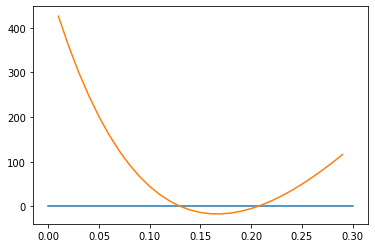

In [42]:
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import *
import numpy_financial as npf
cashflows=[5000,-4300,-4200,-4500,8500]
rate=[]
npv=[]
x=[0,0.3]
y=[0,0]
for i in range(1,30): 
    rate.append(0.01*i)
    npv.append(npf.npv(0.01*i,cashflows))
    
plt.plot(x,y),plt.plot(rate,npv)
plt.show()

<div class="alert alert-block alert-success">
<b>Explanation:</b> Since the direction of cash flow changes twice, we might have two IRRs.For abnormal projects or projects with multiple IRRs, we could not apply the IRR rule. When the cash flows change direction more than once, we might have multiple IRRs.
</div>

<span style="color:green"><b>Congratulations!</b></span>